# Figures for Paper

## ECCO (as same period as SOSE)

In [1]:
import xarray as xr
from matplotlib import pyplot as plt
import gcsfs
import dask
import dask.array as dsa
import numpy as np
import intake
import fsspec
import xmitgcm
from xhistogram.xarray import histogram
from xmitgcm.llcreader.llcmodel import faces_dataset_to_latlon
%matplotlib inline
from fastjmd95 import jmd95numba

wmt_budget_terms = xr.open_zarr(gcsfs.GCSMap('pangeo-tmp/stb2145/ECCO/datasets/wmt_budget_terms/wmt_budget_terms_SP.zarr'))
wmt_budget_terms.load()

wmt_budget_terms = wmt_budget_terms.sel(time=slice('2006', '2010'))

In [64]:
wmt_budget_terms = xr.open_zarr(gcsfs.GCSMap('pangeo-tmp/stb2145/ECCO/datasets/wmt_budget_terms.zarr'))
wmt_budget_terms.load()

<xarray.Dataset>
Dimensions:               (sigma2_bin: 999, time: 288)
Coordinates:
  * sigma2_bin            (sigma2_bin) float64 1.028e+03 1.028e+03 ... 1.037e+03
  * time                  (time) datetime64[ns] 1992-01-15 ... 2015-12-14
    time_snp              (time) datetime64[ns] NaT 1992-03-01 ... NaT
Data variables: (12/17)
    R1                    (time, sigma2_bin) float64 nan nan nan ... nan nan nan
    R2                    (time, sigma2_bin) float64 6.155e+04 6.155e+04 ... 0.0
    dVdt                  (time, sigma2_bin) float64 nan nan nan ... nan nan nan
    omega_mix             (time, sigma2_bin) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    omega_mix_slt         (time, sigma2_bin) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    omega_mix_th          (time, sigma2_bin) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    ...                    ...
    omega_total_th        (time, sigma2_bin) float64 nan nan nan ... nan nan nan
    omega_trans_rate      (time, sigma2_bin) float64 nan nan nan ... nan nan nan
    omega_trans_rate_slt  (time, sigma2_bin) float64 nan nan nan ... nan nan nan
    omega_trans_rate_th   (time, sigma2_bin) float64 nan nan nan ... nan nan nan
    psi_adv               (time, sigma2_bin) float64 nan nan nan ... nan nan nan
    psi_vel               (time, sigma2_bin) float64 nan nan nan ... nan nan nan

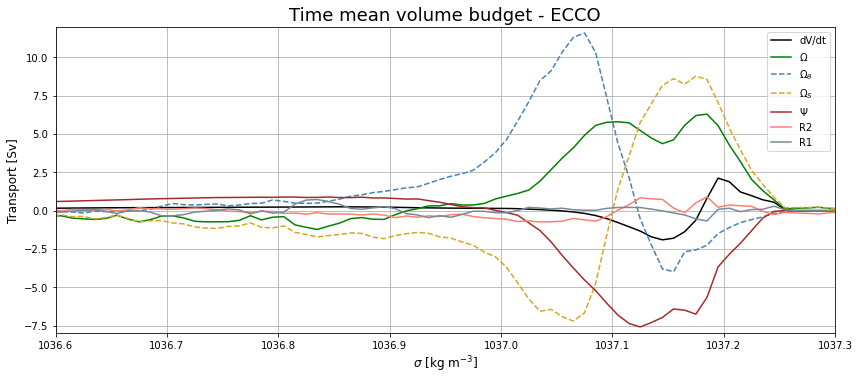

In [65]:
(wmt_budget_terms.dVdt/1e6).mean(dim='time').plot(label='dV/dt', color='k', figsize=(12,5))
(wmt_budget_terms.omega_trans_rate/1e6).mean(dim='time').plot(label=r'$\Omega$', color='green')
(wmt_budget_terms.omega_trans_rate_th/1e6).mean(dim='time').plot(label=r'$\Omega_{\theta}$', color='steelblue', linestyle='dashed')
(wmt_budget_terms.omega_trans_rate_slt/1e6).mean(dim='time').plot(label=r'$\Omega_S$', color='goldenrod', linestyle='dashed')
(wmt_budget_terms.psi_vel/1e6).mean(dim='time').plot(label=r'$\Psi$', color='brown')
(wmt_budget_terms.R2/1e6).mean(dim='time').plot(label='R2', color='salmon')
(wmt_budget_terms.R1/1e6).mean(dim='time').plot(label='R1', color='lightslategray')
#(R3[1:-1]/1e6).mean(dim='time').plot(label=r'$R3$', color='mediumspringgreen')
plt.legend()
plt.grid()
#plt.xlim(1037, 1037.255)
plt.xlim(1036.6, 1037.3)
plt.ylim(-8, 12)
plt.tight_layout()
plt.xlabel(r'$\sigma$ [kg m$^{-3}$]', fontsize=12)
plt.ylabel(r'Transport [Sv]', fontsize=12)
plt.title('Time mean volume budget - ECCO', fontsize=18);

![Water masses time mean WMT budget](ECCO-WMT.jpg)

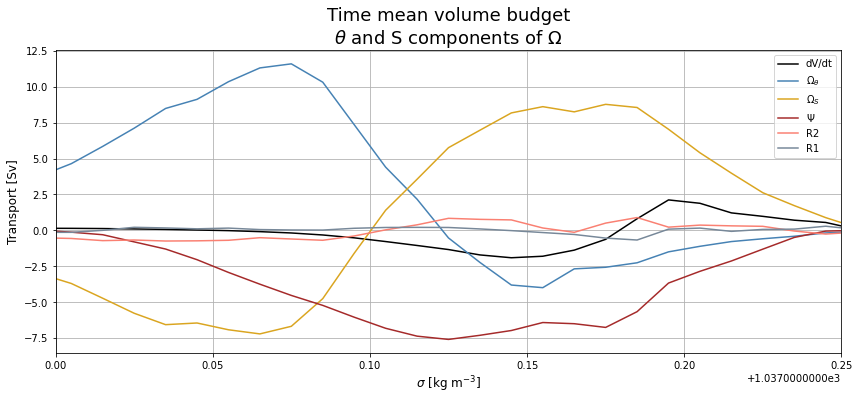

In [66]:
(wmt_budget_terms.dVdt/1e6).mean(dim='time').plot(label='dV/dt', color='k', figsize=(12,5))
(wmt_budget_terms.omega_trans_rate_th/1e6).mean(dim='time').plot(label=r'$\Omega_{\theta}$', color='steelblue')
(wmt_budget_terms.omega_trans_rate_slt/1e6).mean(dim='time').plot(label=r'$\Omega_S$', color='goldenrod')
(wmt_budget_terms.psi_vel/1e6).mean(dim='time').plot(label=r'$\Psi$', color='brown')
(wmt_budget_terms.R2/1e6).mean(dim='time').plot(label='R2', color='salmon')
(wmt_budget_terms.R1/1e6).mean(dim='time').plot(label='R1', color='lightslategray')
#(R3[1:-1]/1e6).mean(dim='time').plot(label=r'$R3$', color='mediumspringgreen')
plt.legend()
plt.grid()
#plt.ylim(-12, 12)
#plt.xlim(1036.5, 1037.3)
plt.xlim(1037, 1037.25)
plt.tight_layout()
plt.xlabel(r'$\sigma$ [kg m$^{-3}$]', fontsize=12)
plt.ylabel(r'Transport [Sv]', fontsize=12)
plt.title("Time mean volume budget\n" r'$\theta$ and S components of $\Omega$', fontsize=18);

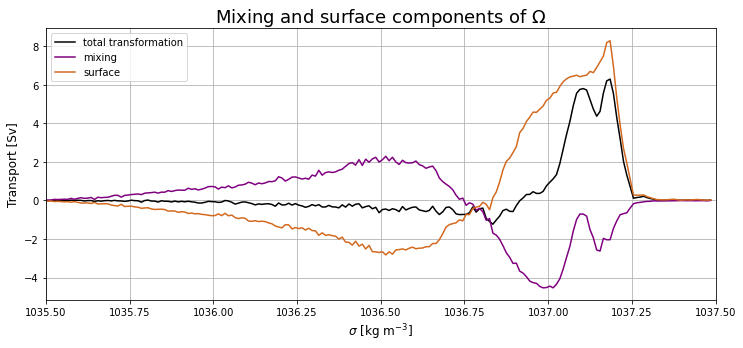

In [67]:
(wmt_budget_terms.omega_trans_rate/1e6).mean(dim='time').plot(figsize=(12,5), label='total transformation', color='k')#, marker='.')
(wmt_budget_terms.omega_mix/1e6).mean(dim='time').plot(label='mixing', color='purple')
(wmt_budget_terms.omega_surf/1e6).mean(dim='time').plot(label='surface', color='chocolate')
plt.legend()
plt.grid()
plt.xlim(1035.5, 1037.5)
#plt.ylim(-6, 6)
plt.xlabel(r'$\sigma$ [kg m$^{-3}$]', fontsize=12)
plt.ylabel(r'Transport [Sv]', fontsize=12)
plt.title(r'Mixing and surface components of $\Omega$', fontsize=18);

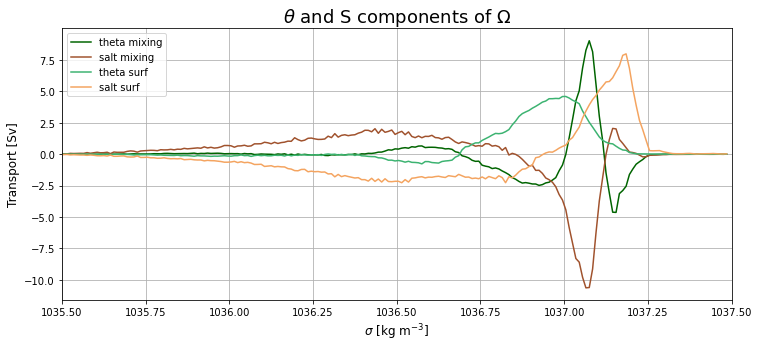

In [68]:
(wmt_budget_terms.omega_mix_th/1e6).mean(dim='time').plot(figsize=(12,5), label='theta mixing', color='darkgreen')
(wmt_budget_terms.omega_mix_slt/1e6).mean(dim='time').plot(label='salt mixing', color='sienna')
(wmt_budget_terms.omega_surf_th/1e6).mean(dim='time').plot(label='theta surf', color='mediumseagreen')
(wmt_budget_terms.omega_surf_slt/1e6).mean(dim='time').plot(label='salt surf', color='sandybrown')
plt.legend()
plt.grid()
plt.xlim(1035.5, 1037.5)
#plt.ylim(-10, 10)
plt.xlabel(r'$\sigma$ [kg m$^{-3}$]', fontsize=12)
plt.ylabel(r'Transport [Sv]', fontsize=12)
plt.title(r'$\theta$ and S components of $\Omega$', fontsize=18);

In [69]:
def anom(da):
    clim = da.groupby('time.month').mean(dim='time')
    anom = da.groupby('time.month') - clim
    #anom_chunk = anom.chunk({'time':12})
    anom_rolled = anom.rolling(time=12).mean(dim='time') #yearly rolling mean to remove seasonal cycle
    return anom_rolled

In [70]:
anom_ds = xr.merge([wmt_budget_terms.dVdt.rename('dVdt'), wmt_budget_terms.R1.rename('R1'), 
                    wmt_budget_terms.psi_vel.rename('psi_vel'), wmt_budget_terms.R2.rename('R2'), 
                    wmt_budget_terms.omega_trans_rate.rename('omega_trans_rate'), 
                    wmt_budget_terms.omega_surf_slt.rename('omega_surf_slt'),
                    wmt_budget_terms.omega_surf_th.rename('omega_surf_th'), 
                    wmt_budget_terms.omega_mix.rename('omega_mix')])


In [72]:
def clim(da):
    clim = da.groupby('time.month').mean(dim='time')
    #anom_rolled = anom.rolling(time=12).mean(dim='time')
    return clim

In [73]:
clim_ds = anom_ds

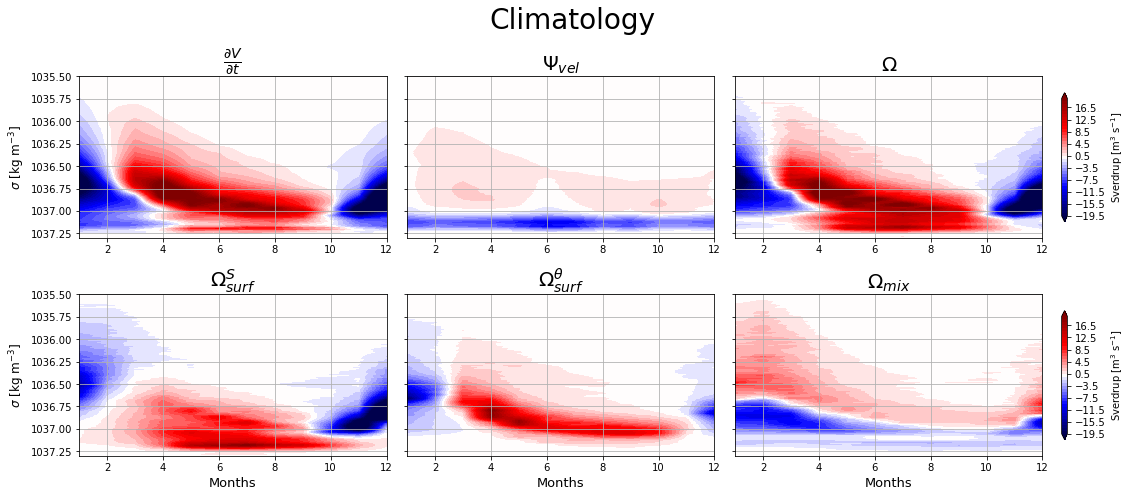

In [74]:
fig, ax = plt.subplots(2, 3, figsize=(16, 7), sharey=True, gridspec_kw={'width_ratios': [2.4,2.4,3]})

levels = np.arange(-20, 20) + 0.5

dVdt_clim = clim(clim_ds.dVdt) / 1e6
c = ax[0,0].contourf(dVdt_clim.month, 
                   dVdt_clim.sigma2_bin, 
                   dVdt_clim.T, cmap='seismic', levels=levels, extend='both')
#plt.colorbar(c, shrink=0.8, label=r'Sverdrup [$\frac{m^3}{s}]$', ax=ax[0,0])
ax[0,0].set_ylabel(r'$\sigma$ [kg m$^{-3}$]', fontsize=12)
#ax[0,0].set_xlabel('Time', fontsize=14)
ax[0,0].set_title(r'$\frac{\partial V}{\partial t}$', fontsize=20)
ax[0,0].set_ylim(1037.3, 1035.5)
#ax[0,0].set_xlim(xmin='1993')
ax[0,0].grid()

psi_vel_clim = clim(clim_ds.psi_vel) / 1e6
c_psi = ax[0,1].contourf(psi_vel_clim.month, psi_vel_clim.sigma2_bin, psi_vel_clim.T,
                         cmap='seismic', levels=levels, extend='both')
#plt.colorbar(c_psi, shrink=0.8, label=r'Sverdrup [$\frac{m^3}{s}$]', ax=ax[0,1])
#ax[1,1].set_ylabel(r'$\sigma [\frac{kg}{m^3}]$', fontsize=14)
#ax[1,1].set_xlabel('Time', fontsize=14)
ax[0,1].set_title(r'$\Psi_{vel}$', fontsize=20)
ax[0,1].set_ylim(1037.3, 1035.5)
#ax[0,1].set_xlim(xmin='1993')
ax[0,1].grid()

omega_clim = clim(clim_ds.omega_trans_rate) /1e6
c_omega = ax[0,2].contourf(omega_clim.month, omega_clim.sigma2_bin, omega_clim.T,
                           cmap='seismic', levels=levels, extend='both')
plt.colorbar(c_omega, shrink=0.8, label=r'Sverdrup [m$^3$ s$^{-1}$]', ax=ax[0,2])
#ax[0,1].set_ylabel(r'$\sigma [\frac{kg}{m^3}]$', fontsize=14)
#ax[0,1].set_xlabel('Time', fontsize=14)
ax[0,2].set_title(r'$\Omega$', fontsize=20)
ax[0,2].set_ylim(1037.3, 1035.5)
#ax[0,2].set_xlim(xmin='1993')
ax[0,2].grid()

omega_surf_slt_clim = clim(clim_ds.omega_surf_slt)/1e6
c_surf_slt = ax[1,0].contourf(omega_surf_slt_clim.month, 
                                omega_surf_slt_clim.sigma2_bin, 
                                omega_surf_slt_clim.T, cmap='seismic', levels=levels, extend='both')
#plt.colorbar(c_surf_slt, shrink=0.8, label=r'Sverdrup [$\frac{m^3}{s}$]', ax=ax[1,0])
ax[1,0].set_ylabel(r'$\sigma$ [kg m$^{-3}$]', fontsize=12)
ax[1,0].set_xlabel('Months', fontsize=13)
ax[1,0].set_title('$\Omega^{S}_{surf}$', fontsize=20)
ax[1,0].set_ylim(1037.3, 1035.5)
#ax[1,0].set_xlim(xmin='1993')
ax[1,0].grid()

omega_surf_th_clim = clim(clim_ds.omega_surf_th) /1e6
c_surf_th = ax[1,1].contourf(omega_surf_th_clim.month, omega_surf_th_clim.sigma2_bin, 
                        omega_surf_th_clim.T, cmap='seismic', levels=levels, extend='both')
#plt.colorbar(c_surf_th, shrink=0.8, label=r'Sverdrup [$\frac{m^3}{s}]$', ax=ax[1,1])
#ax[1,1].set_ylabel(r'$\sigma [\frac{kg}{m^3}]$', fontsize=14)
ax[1,1].set_xlabel('Months', fontsize=13)
ax[1,1].set_title(r'$\Omega^{\theta}_{surf}$', fontsize=20)
ax[1,1].set_ylim(1037.3, 1035.5)
#ax[1,1].set_xlim(xmin='1993')
ax[1,1].grid()

omega_mix__clim = clim(clim_ds.omega_mix) / 1e6
c_mix = ax[1,2].contourf(omega_mix__clim.month, omega_mix__clim.sigma2_bin, omega_mix__clim.T, 
                        cmap='seismic', levels=levels, extend='both')
plt.colorbar(c_mix, shrink=0.8, label=r'Sverdrup [m$^3$ s$^{-1}$]', ax=ax[1,2])
#ax[1,2].set_ylabel(r'$\sigma [\frac{kg}{m^3}]$', fontsize=14)
ax[1,2].set_xlabel('Months', fontsize=13)
ax[1,2].set_title(r'$\Omega_{mix}$', fontsize=20)
ax[1,2].set_ylim(1037.3, 1035.5)
#ax[1,2].set_xlim(xmin='1993')
ax[1,2].grid()

plt.suptitle('Climatology', fontsize=28)
plt.tight_layout();

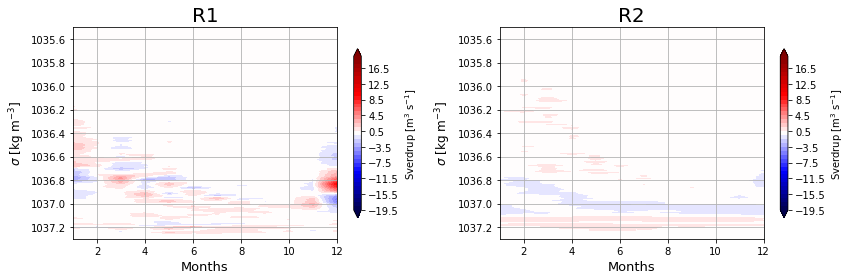

In [75]:
fig, (ax0,ax1) = plt.subplots(1,2, figsize=(12,4))

levels = np.arange(-20, 20) + 0.5

R1_clim = clim(clim_ds.R1) / 1e6
c = ax0.contourf(R1_clim.month, 
                   R1_clim.sigma2_bin, 
                   R1_clim.T, cmap='seismic', levels=levels, extend='both')
plt.colorbar(c, shrink=0.8, label=r'Sverdrup [m$^3$ s$^{-1}$]', ax=ax0)
ax0.set_ylabel(r'$\sigma$ [kg m$^{-3}$]', fontsize=12)
ax0.set_xlabel('Months', fontsize=13)
ax0.set_title('R1', fontsize=20)
ax0.set_ylim(1037.3, 1035.5)
ax0.grid()

R2_clim = clim(clim_ds.R2) / 1e6
c = ax1.contourf(R2_clim.month, 
                   R2_clim.sigma2_bin, 
                   R2_clim.T, cmap='seismic', levels=levels, extend='both')
plt.colorbar(c, shrink=0.8, label=r'Sverdrup [m$^3$ s$^{-1}$]', ax=ax1)
ax1.set_xlabel('Months', fontsize=13)
ax1.set_ylabel(r'$\sigma$ [kg m$^{-3}$]', fontsize=12)
ax1.set_title('R2', fontsize=20)
ax1.set_ylim(1037.3, 1035.5)
ax1.grid()

plt.tight_layout();

In [99]:
anom_ds.dVdt.time[240]

<xarray.DataArray 'time' ()>
array('2012-01-15T00:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time      datetime64[ns] 2012-01-15
    time_snp  datetime64[ns] 2012-02-01

In [98]:
20*12

240

In [93]:
np.arange(0,23,5)

array([ 0,  5, 10, 15, 20])

In [100]:
year_start_index = list(np.arange(0, 23, 5) * 12) #[0, 12, 24, 36, 48, ]

In [102]:
import warnings
warnings.filterwarnings("ignore")

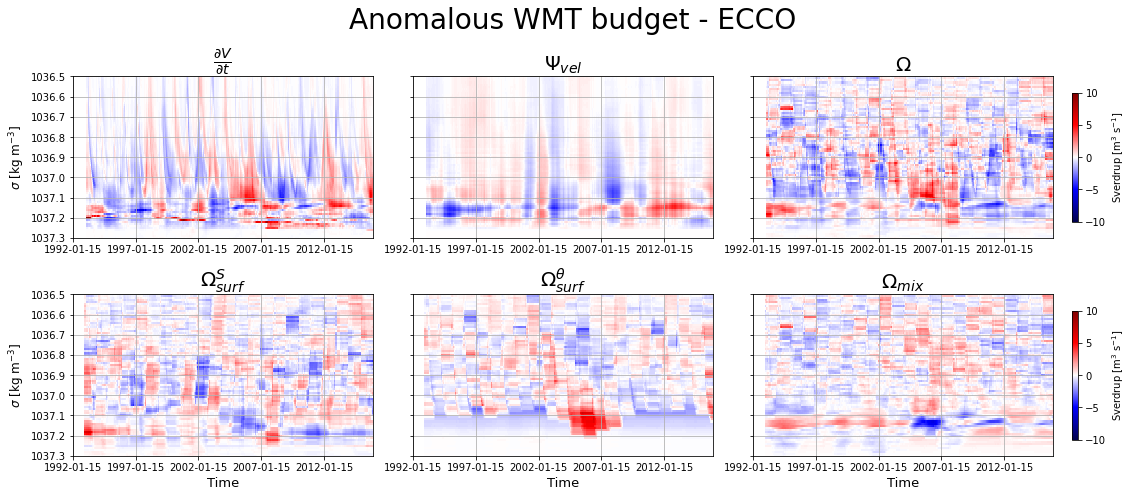

In [103]:
fig, ax = plt.subplots(2, 3, figsize=(16, 7), sharey=True, gridspec_kw={'width_ratios': [2.4,2.4,3]})#, sharex=True)

dVdt_anom_rolled = anom(anom_ds.dVdt) / 1e6
c = ax[0,0].pcolormesh(dVdt_anom_rolled.time, 
                   dVdt_anom_rolled.sigma2_bin, 
                   dVdt_anom_rolled.T, vmin=-10, vmax=10, cmap='seismic')
#plt.colorbar(c, shrink=0.8, label=r'Sverdrup [$\frac{m^3}{s}]$', ax=ax[0,0])
ax[0,0].set_ylabel(r'$\sigma$ [kg m$^{-3}$]', fontsize=12)
#ax[0,0].set_xlabel('Time', fontsize=14)
ax[0,0].set_title(r'$\frac{\partial V}{\partial t}$', fontsize=20)
ax[0,0].set_ylim(1037.3, 1036.5)
ax[0,0].set_xticks(dVdt_anom_rolled.time.values[year_start_index])
#ax[0,0].set_xticklabels(np.arange(2006, 2011))
ax[0,0].grid()

psi_vel_anom_rolled = anom(anom_ds.psi_vel) / 1e6
c_psi = ax[0,1].pcolormesh(psi_vel_anom_rolled.time, psi_vel_anom_rolled.sigma2_bin, psi_vel_anom_rolled.T,
                        vmin=-10, vmax=10, cmap='seismic')
#plt.colorbar(c_psi, shrink=0.8, label=r'Sverdrup [$\frac{m^3}{s}$]', ax=ax[0,1])
#ax[1,1].set_ylabel(r'$\sigma [\frac{kg}{m^3}]$', fontsize=14)
#ax[1,1].set_xlabel('Time', fontsize=14)
ax[0,1].set_title(r'$\Psi_{vel}$', fontsize=20)
ax[0,1].set_ylim(1037.3, 1036.5)
ax[0,1].set_xticks(psi_vel_anom_rolled.time.values[year_start_index])
#ax[0,1].set_xticklabels(np.arange(2006, 2011))
ax[0,1].grid()

omega_anom_rolled = anom(anom_ds.omega_trans_rate) /1e6
c_omega = ax[0,2].pcolormesh(omega_anom_rolled.time, omega_anom_rolled.sigma2_bin, omega_anom_rolled.T,
                        vmin=-10, vmax=10, cmap='seismic')
plt.colorbar(c_omega, shrink=0.8, label=r'Sverdrup [m$^3$ s$^{-1}$]', ax=ax[0,2])
#ax[0,1].set_ylabel(r'$\sigma [\frac{kg}{m^3}]$', fontsize=14)
#ax[0,1].set_xlabel('Time', fontsize=14)
ax[0,2].set_title(r'$\Omega$', fontsize=20)
ax[0,2].set_ylim(1037.3, 1036.5)
ax[0,2].set_xticks(omega_anom_rolled.time.values[year_start_index])
#ax[0,2].set_xticklabels(np.arange(2006, 2011))
ax[0,2].grid()

omega_surf_slt_anom_rolled = anom(anom_ds.omega_surf_slt)/1e6
c_surf_slt = ax[1,0].pcolormesh(omega_surf_slt_anom_rolled.time, 
                                omega_surf_slt_anom_rolled.sigma2_bin, 
                                omega_surf_slt_anom_rolled.T, vmin=-10, vmax=10, cmap='seismic')
#plt.colorbar(c_surf_slt, shrink=0.8, label=r'Sverdrup [$\frac{m^3}{s}$]', ax=ax[1,0])
ax[1,0].set_ylabel(r'$\sigma$ [kg m$^{-3}$]', fontsize=12)
ax[1,0].set_xlabel('Time', fontsize=13)
ax[1,0].set_title('$\Omega^{S}_{surf}$', fontsize=20)
ax[1,0].set_ylim(1037.3, 1036.5)
ax[1,0].set_xticks(omega_surf_slt_anom_rolled.time.values[year_start_index])
#ax[1,0].set_xticklabels(np.arange(2006, 2011))
ax[1,0].grid()

omega_surf_th_anom_rolled = anom(anom_ds.omega_surf_th) /1e6
c_surf_th = ax[1,1].pcolormesh(omega_surf_th_anom_rolled.time, omega_surf_th_anom_rolled.sigma2_bin, 
                        omega_surf_th_anom_rolled.T, vmin=-10, vmax=10, cmap='seismic')
#plt.colorbar(c_surf_th, shrink=0.8, label=r'Sverdrup [$\frac{m^3}{s}]$', ax=ax[1,1])
#ax[1,1].set_ylabel(r'$\sigma [\frac{kg}{m^3}]$', fontsize=14)
ax[1,1].set_xlabel('Time', fontsize=13)
ax[1,1].set_title(r'$\Omega^{\theta}_{surf}$', fontsize=20)
ax[1,1].set_ylim(1037.3, 1036.5)
ax[1,1].set_xticks(omega_surf_th_anom_rolled.time.values[year_start_index])
#ax[1,1].set_xticklabels(np.arange(2006, 2011))
ax[1,1].grid()

omega_mix_anom_rolled = anom(anom_ds.omega_mix) / 1e6
c_mix = ax[1,2].pcolormesh(omega_mix_anom_rolled.time, omega_mix_anom_rolled.sigma2_bin, omega_mix_anom_rolled.T, 
                        vmin=-10, vmax=10, cmap='seismic')
plt.colorbar(c_mix, shrink=0.8, label=r'Sverdrup [m$^3$ s$^{-1}$]', ax=ax[1,2])
#ax[1,2].set_ylabel(r'$\sigma [\frac{kg}{m^3}]$', fontsize=14)
ax[1,2].set_xlabel('Time', fontsize=13)
ax[1,2].set_title(r'$\Omega_{mix}$', fontsize=20)
ax[1,2].set_ylim(1037.3, 1036.5)
ax[1,2].set_xticks(omega_mix_anom_rolled.time.values[year_start_index])
#ax[1,2].set_xticklabels(np.arange(2006, 2011))
ax[1,2].grid()

plt.suptitle('Anomalous WMT budget - ECCO', fontsize=28)
plt.tight_layout();

## Water mass classes timeseries

In [104]:
import sys
#telling python where the module lives
sys.path.insert(0, '/home/jovyan/WMT-project/')
from sum_wm_bins import sum_wm_bins

In [105]:
wm_type = ['cdw', 'wsdw', 'wsbw', 'isw']

wmt_terms = [dVdt_anom_rolled, psi_vel_anom_rolled, omega_anom_rolled, omega_surf_slt_anom_rolled,
             omega_surf_th_anom_rolled, omega_mix_anom_rolled]

term_names = ['dVdt_anom_rolled', 'psi_vel_anom_rolled', 'omega_anom_rolled', 'omega_surf_slt_anom_rolled',
             'omega_surf_th_anom_rolled', 'omega_mix_anom_rolled']

In [106]:
def datasetmaker(wm_term):
    """Creating new ds for each wmt budget term with wm classes as variables."""
    new_ds = xr.Dataset({'cdw': sum_wm_bins(wm_term, 'cdw'), 'wsdw':sum_wm_bins(wm_term, 'wsdw'),
                           'wsbw': sum_wm_bins(wm_term, 'wsbw'), 'isw': sum_wm_bins(wm_term, 'isw')}, attrs=dict(Name=wm_term.name))
    return new_ds

In [107]:
wmt_terms[0].name

'dVdt'

In [108]:
term_names[0]

'dVdt_anom_rolled'

In [109]:
k=0
for term in (wmt_terms):
    term_names[k] = datasetmaker(term)
    k=k+1

In [110]:
term_names[0].attrs.get('Name')

'dVdt'

In [111]:
len(term_names)

6

In [112]:
#trying to assign vars with term_names at end of name for each ds in term_names
F"wm_ds_{term_names[5].attrs.get('Name')}" #= term_names[0]

'wm_ds_omega_mix'

In [113]:
term_names[0]

<xarray.Dataset>
Dimensions:   (time: 288)
Coordinates:
  * time      (time) datetime64[ns] 1992-01-15 1992-02-13 ... 2015-12-14
    time_snp  (time) datetime64[ns] NaT 1992-03-01 1992-04-01 ... 2015-12-01 NaT
    month     (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    cdw       (time) float64 0.0 0.0 0.0 0.0 0.0 ... 32.43 54.02 49.92 43.6 0.0
    wsdw      (time) float64 0.0 0.0 0.0 0.0 0.0 ... 6.266 5.161 6.497 0.0
    wsbw      (time) float64 0.0 0.0 0.0 0.0 0.0 ... -1.112 -0.8854 0.2726 0.0
    isw       (time) float64 0.0 0.0 0.0 0.0 ... -0.07547 -0.07491 -0.07513 0.0
Attributes:
    Name:     dVdt

In [114]:
wm_ds_dVdt = term_names[0].drop(['month', 'time_snp'])
wm_ds_psi_vel = term_names[1].drop(['month', 'time_snp'])
wm_ds_omega_trans_rate = term_names[2].drop(['month', 'time_snp'])
wm_ds_omega_surf_slt = term_names[3].drop(['month', 'time_snp'])
wm_ds_omega_surf_th = term_names[4].drop(['month', 'time_snp'])
wm_ds_omega_mix = term_names[5].drop(['month', 'time_snp'])

In [115]:
wm_ds_dVdt

<xarray.Dataset>
Dimensions:  (time: 288)
Coordinates:
  * time     (time) datetime64[ns] 1992-01-15 1992-02-13 ... 2015-12-14
Data variables:
    cdw      (time) float64 0.0 0.0 0.0 0.0 0.0 ... 32.43 54.02 49.92 43.6 0.0
    wsdw     (time) float64 0.0 0.0 0.0 0.0 0.0 ... -1.748 6.266 5.161 6.497 0.0
    wsbw     (time) float64 0.0 0.0 0.0 0.0 0.0 ... -1.112 -0.8854 0.2726 0.0
    isw      (time) float64 0.0 0.0 0.0 0.0 ... -0.07547 -0.07491 -0.07513 0.0
Attributes:
    Name:     dVdt

## Visualize timeseries of wmt terms in wm classes, [seaice, sam, enso indices]

In [116]:
# For Visualization
import panel as pn
import holoviews as hv
from holoviews import opts
import geoviews as gv
import param


import pandas as pd
import panel as pn
import param as pm
import hvplot.pandas

## Import hvplot apis for xarray and pandas
import hvplot.xarray
import hvplot.pandas

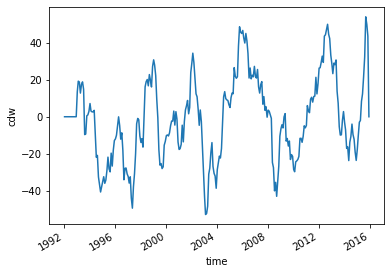

In [137]:
wm_ds_dVdt.cdw.plot()

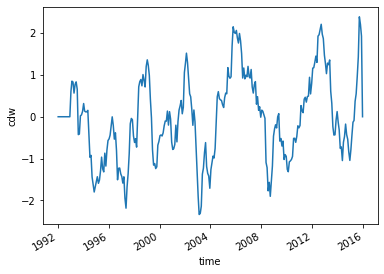

In [140]:
(wm_ds_dVdt.cdw/wm_ds_dVdt.cdw.std('time')).plot()

In [142]:
#Standardized wmt terms

#dVdt
show__dVdt1 = pn.widgets.Checkbox(name='CDW-dVdt')
show__dVdt2 = pn.widgets.Checkbox(name='WSBW-dVdt')
show__dVdt3 = pn.widgets.Checkbox(name='WSBW-dVdt')
show__dVdt4 = pn.widgets.Checkbox(name='ISW-dVdt')

dVdt_plot1 = (wm_ds_dVdt.cdw/wm_ds_dVdt.cdw.std('time')).hvplot(ylabel='Sv', title= 'dVdt = Psi + Omega')
dVdt_plot2 = (wm_ds_dVdt.wsdw/wm_ds_dVdt.wsdw.std('time')).hvplot()
dVdt_plot3 = (wm_ds_dVdt.wsbw/wm_ds_dVdt.wsbw.std('time')).hvplot()
dVdt_plot4 = (wm_ds_dVdt/wm_ds_dVdt.isw.std('time')).isw.hvplot()

#Psi
show__psi1 = pn.widgets.Checkbox(name='CDW-psi')
show__psi2 = pn.widgets.Checkbox(name='WSBW-psi')
show__psi3 = pn.widgets.Checkbox(name='WSBW-psi')
show__psi4 = pn.widgets.Checkbox(name='ISW-psi')

psi_plot1 = (wm_ds_psi_vel.cdw/wm_ds_psi_vel.cdw.std('time')).hvplot()
psi_plot2 = (wm_ds_psi_vel.wsdw/wm_ds_psi_vel.wsdw.std('time')).hvplot()
psi_plot3 = (wm_ds_psi_vel.wsbw/wm_ds_psi_vel.wsbw.std('time')).hvplot()
psi_plot4 = (wm_ds_psi_vel.isw/wm_ds_psi_vel.isw.std('time')).hvplot()

#omega
show__omega1 = pn.widgets.Checkbox(name='CDW-omega')
show__omega2 = pn.widgets.Checkbox(name='WSBW-omega')
show__omega3 = pn.widgets.Checkbox(name='WSBW-omega')
show__omega4 = pn.widgets.Checkbox(name='ISW-omega')

omega_plot1 = (wm_ds_omega_trans_rate.cdw/wm_ds_omega_trans_rate.cdw.std('time')).hvplot()
omega_plot2 = (wm_ds_omega_trans_rate.wsdw/wm_ds_omega_trans_rate.wsdw.std('time')).hvplot()
omega_plot3 = (wm_ds_omega_trans_rate.wsbw/wm_ds_omega_trans_rate.wsbw.std('time')).hvplot()
omega_plot4 = (wm_ds_omega_trans_rate.isw/wm_ds_omega_trans_rate.isw.std('time')).hvplot()

#omega_mix
show__omega_mix1 = pn.widgets.Checkbox(name='CDW-omega_mix')
show__omega_mix2 = pn.widgets.Checkbox(name='WSBW-omega_mix')
show__omega_mix3 = pn.widgets.Checkbox(name='WSBW-omega_mix')
show__omega_mix4 = pn.widgets.Checkbox(name='ISW-omega_mix')

omega_mix_plot1 = (wm_ds_omega_mix.cdw/wm_ds_omega_mix.cdw.std('time')).hvplot()
omega_mix_plot2 = (wm_ds_omega_mix.wsdw/wm_ds_omega_mix.wsdw.std('time')).hvplot()
omega_mix_plot3 = (wm_ds_omega_mix.wsbw/wm_ds_omega_mix.wsbw.std('time')).hvplot()
omega_mix_plot4 = (wm_ds_omega_mix.isw/wm_ds_omega_mix.isw.std('time')).hvplot()

#omega_surf_slt
show__slt1 = pn.widgets.Checkbox(name='CDW-omega_surf_SLT')
show__slt2 = pn.widgets.Checkbox(name='WSBW-omega_surf_SLT')
show__slt3 = pn.widgets.Checkbox(name='WSBW-omega_surf_SLT')
show__slt4 = pn.widgets.Checkbox(name='ISW-omega_surf_SLT')

omega_slt_plot1 = (wm_ds_omega_surf_slt.cdw/wm_ds_omega_surf_slt.cdw.std('time')).hvplot()
omega_slt_plot2 = (wm_ds_omega_surf_slt.wsdw/wm_ds_omega_surf_slt.wsdw.std('time')).hvplot()
omega_slt_plot3 = (wm_ds_omega_surf_slt.wsbw/wm_ds_omega_surf_slt.wsbw.std('time')).hvplot()
omega_slt_plot4 = (wm_ds_omega_surf_slt.isw/wm_ds_omega_surf_slt.isw.std('time')).hvplot()

#omega_surf_th
show__th1 = pn.widgets.Checkbox(name='CDW-omega_surf_TH')
show__th2 = pn.widgets.Checkbox(name='WSBW-omega_surf_TH')
show__th3 = pn.widgets.Checkbox(name='WSBW-omega_surf_TH')
show__th4 = pn.widgets.Checkbox(name='ISW-omega_surf_TH')

omega_th_plot1 = (wm_ds_omega_surf_th.cdw/wm_ds_omega_surf_th.cdw.std('time')).hvplot()
omega_th_plot2 = (wm_ds_omega_surf_th.wsdw/wm_ds_omega_surf_th.wsdw.std('time')).hvplot()
omega_th_plot3 = (wm_ds_omega_surf_th.wsbw/wm_ds_omega_surf_th.wsbw.std('time')).hvplot()
omega_th_plot4 = (wm_ds_omega_surf_th.isw/wm_ds_omega_surf_th.isw.std('time')).hvplot()

#Indices
show__ENSO = pn.widgets.Checkbox(name='ENSO')
#show__SAM = pn.widgets.Checkbox(name='SAM')
show__ECCO = pn.widgets.Checkbox(name='ECCO')

enso_plot = enso_ecco_time.hvplot()
#sam_plot = sam_ecco_time.hvplot()
ecco_plot = ecco.ecco_si_index.drop(['month', 'k']).hvplot()


@pn.depends(show__dVdt1.param.value, show__dVdt2.param.value, show__dVdt3.param.value, show__dVdt4.param.value,
            show__psi1.param.value, show__psi2.param.value, show__psi3.param.value, show__psi4.param.value,
            show__omega1.param.value, show__omega2.param.value, show__omega3.param.value, show__omega4.param.value,
            show__omega_mix1.param.value, show__omega_mix2.param.value, show__omega_mix3.param.value, show__omega_mix4.param.value,
            show__slt1.param.value, show__slt2.param.value, show__slt3.param.value, show__slt4.param.value,
            show__th1.param.value, show__th2.param.value, show__th3.param.value, show__th4.param.value,
            show__ENSO.param.value, show__ECCO.param.value)#, show__SAM.param.value)


def get_plot(dVdt1, dVdt2, dVdt3, dVdt4,
             psi1, psi2, psi3, psi4,
             omega1, omega2, omega3, omega4,
             omega_mix1, omega_mix2, omega_mix3, omega_mix4,
             omega_slt1, omega_slt2, omega_slt3, omega_slt4,
             omega_th1, omega_th2, omega_th3, omega_th4, enso, ecco): #, sam):
    return (dVdt_plot1.opts(alpha=dVdt1)*dVdt_plot2.opts(alpha=dVdt2)*dVdt_plot3.opts(alpha=dVdt3)*dVdt_plot4.opts(alpha=dVdt4)*
            psi_plot1.opts(alpha=psi1)*psi_plot2.opts(alpha=psi2)*psi_plot3.opts(alpha=psi3)*psi_plot4.opts(alpha=psi4)*
            omega_plot1.opts(alpha=omega1)*omega_plot2.opts(alpha=omega2)*omega_plot3.opts(alpha=omega3)*omega_plot4.opts(alpha=omega4)*
            omega_mix_plot1.opts(alpha=omega_mix1)*omega_mix_plot2.opts(alpha=omega_mix2)*
            omega_mix_plot3.opts(alpha=omega_mix3)*omega_mix_plot4.opts(alpha=omega_mix4)*
            omega_slt_plot1.opts(alpha=omega_slt1)*omega_slt_plot2.opts(alpha=omega_slt2)*
            omega_slt_plot3.opts(alpha=omega_slt3)*omega_slt_plot4.opts(alpha=omega_slt4)*
            omega_th_plot1.opts(alpha=omega_th1)*omega_th_plot2.opts(alpha=omega_th2)*
            omega_th_plot3.opts(alpha=omega_th3)*omega_th_plot4.opts(alpha=omega_th4)*
            enso_plot.opts(alpha=enso)*ecco_plot.opts(alpha=ecco))#*sam_plot.opts(alpha=sam))

In [143]:
pn.Row(pn.Column(show__dVdt1, show__dVdt2, show__dVdt3, show__dVdt4, 
                 show__psi1, show__psi2, show__psi3, show__psi4,
                 show__omega1, show__omega2, show__omega3, show__omega4,
                 show__omega_mix1, show__omega_mix2, show__omega_mix3, show__omega_mix4,
                 show__slt1, show__slt2, show__slt3, show__slt4,
                 show__th1, show__th2, show__th3, show__th4, show__ENSO, show__ECCO,
                 width=150, max_height=250, height_policy='max', scroll=True), 
       get_plot, scroll=True)

Row(scroll=True)
    [0] Column(height_policy='max', max_height=250, scroll=True, width=150)
        [0] Checkbox(name='CDW-dVdt')
        [1] Checkbox(name='WSBW-dVdt')
        [2] Checkbox(name='WSBW-dVdt')
        [3] Checkbox(name='ISW-dVdt')
        [4] Checkbox(name='CDW-psi')
        [5] Checkbox(name='WSBW-psi')
        [6] Checkbox(name='WSBW-psi')
        [7] Checkbox(name='ISW-psi')
        [8] Checkbox(name='CDW-omega')
        [9] Checkbox(name='WSBW-omega')
        [10] Checkbox(name='WSBW-omega')
        [11] Checkbox(name='ISW-omega')
        [12] Checkbox(name='CDW-omega_mix')
        [13] Checkbox(name='WSBW-omega_mix')
        [14] Checkbox(name='WSBW-omega_mix')
        [15] Checkbox(name='ISW-omega_mix')
        [16] Checkbox(name='CDW-omega_surf_SLT')
        [17] Checkbox(name='WSBW-omega_surf_SLT')
        [18] Checkbox(name='WSBW-omega_surf_SLT')
        [19] Checkbox(name='ISW-omega_surf_SLT')
        [20] Checkbox(name='CDW-omega_surf_TH')
        [21] Checkbox(name='WSBW-omega_surf_TH')
        [22] Checkbox(name='WSBW-omega_surf_TH')
        [23] Checkbox(name='ISW-omega_surf_TH')
        [24] Checkbox(name='ENSO')
        [25] Checkbox(name='ECCO')
    [1] ParamFunction(function)

## Loading in Sea ice, SAM, ENSO timeseries

In [117]:
ecco = xr.open_zarr(gcsfs.GCSMap('pangeo-tmp/stb2145/ECCO/datasets/ecco_si_index.zarr'))
sam = xr.open_dataarray('/home/jovyan/WMT-project/Climate-Indices/SAM-index/sam_index')
enso = xr.open_dataarray('/home/jovyan/WMT-project/Climate-Indices/ENSO-index/oni')

In [118]:
enso.sel(time=slice('1992', '2015'))

<xarray.DataArray 'sst' (time: 288)>
array([1.883747, 1.786449, 1.614739, ..., 2.599419, 2.746488, 2.794896],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1992-01-01 1992-02-01 ... 2015-12-01
    month    (time) int64 ...

In [120]:
ecco.time

<xarray.DataArray 'time' (time: 288)>
array(['1992-01-15T00:00:00.000000000', '1992-02-13T00:00:00.000000000',
       '1992-03-15T00:00:00.000000000', ..., '2015-10-15T00:00:00.000000000',
       '2015-11-14T00:00:00.000000000', '2015-12-14T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
    k        int64 ...
    month    (time) int64 dask.array<chunksize=(288,), meta=np.ndarray>
  * time     (time) datetime64[ns] 1992-01-15 1992-02-13 ... 2015-12-14
Attributes:
    axis:           T
    long_name:      Time
    standard_name:  time

In [122]:
enso_ecco_time = enso.sel(time=slice('1992', '2015')).assign_coords(coords={'time':ecco.time}).drop(['month', 'k'])
enso_ecco_time

<xarray.DataArray 'sst' (time: 288)>
array([1.883747, 1.786449, 1.614739, ..., 2.599419, 2.746488, 2.794896],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1992-01-15 1992-02-13 ... 2015-12-14

In [124]:
sam.sel(time=slice('1992', '2015'))

<xarray.DataArray (time: 288)>
array([-0.122525, -0.885817, -0.616002, ..., -0.384399,  0.833789,  0.318706])
Coordinates:
  * time     (time) datetime64[ns] 1992-01-31 1992-02-29 ... 2015-12-31
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12

In [125]:
sam_ecco_time = sam.sel(time=slice('1992', '2015')).assign_coords(coords={'time':ecco.time}).drop(['month', 'k'])
sam_ecco_time

<xarray.DataArray (time: 288)>
array([-0.122525, -0.885817, -0.616002, ..., -0.384399,  0.833789,  0.318706])
Coordinates:
  * time     (time) datetime64[ns] 1992-01-15 1992-02-13 ... 2015-12-14

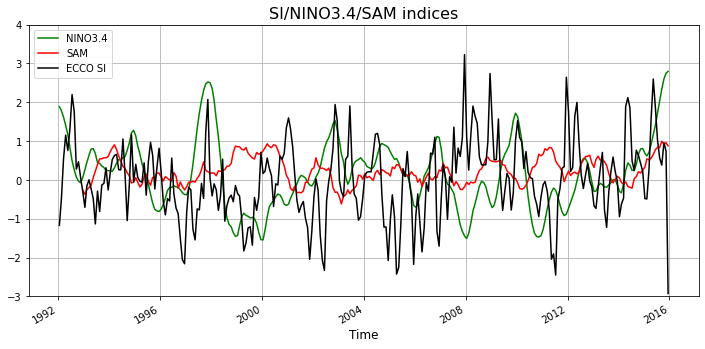

In [126]:
plt.figure(figsize=(12,5))
enso_ecco_time.sel(time=slice('1992', '2015')).plot(color='green', label='NINO3.4')
sam_ecco_time.rolling(time=12).mean().plot(color='red', label='SAM') #12mth rolling mean
ecco.ecco_si_index.plot(color='k', label='ECCO SI')
plt.legend()
plt.grid()
plt.ylim(-3,4) #ylims with rolling mean
#plt.ylim(-6,6) #ylims without rolling mean
#plt.xlim('1992-01-01', '2015-12-01')
plt.title('SI/NINO3.4/SAM indices', fontsize=16)
plt.xlabel('Time', fontsize=12)
plt.ylabel('');